In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def compute_distances(x, u):
    distances = np.zeros((x.shape[0], u.shape[0]))
    for i in range(u.shape[0]):
        diff = x - u[i, :].reshape((1, -1))
        distances[:, i] = np.sum(np.square(diff), axis=1)
    return distances

In [ ]:
def predict_clusters(x, u):
    distances = compute_distances(x, u)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments.reshape(-1, 1)

In [ ]:
def update_means(x, c):
    means = np.zeros((2, x.shape[1]))
    for i in range(2):
        means[i, :] = np.mean(x[c[:, 0] == i], axis=0)
    return means

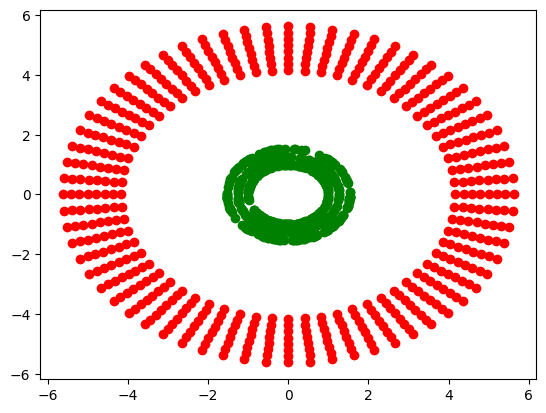

In [ ]:
x_data = np.genfromtxt('/content/drive/MyDrive/data (2)/data/kmeans_data.txt')

# Feature extraction
fx = (np.sum(np.square(x_data), axis=1)).reshape(-1, 1)

# Initialize centroids using the first two features
centroids = fx[:2, :]

# Assign data points to clusters
cluster_assignments = predict_clusters(fx, centroids)

for iteration in range(10):
    # Update centroids based on mean of each cluster
    centroids = update_means(fx, cluster_assignments)

    # Assign data points to clusters using updated centroids
    cluster_assignments = predict_clusters(fx, centroids)

# Separate points in each cluster for plotting
positive_cluster = (cluster_assignments == 1).reshape(cluster_assignments.shape[0])
negative_cluster = (cluster_assignments == 0).reshape(cluster_assignments.shape[0])

# Plot the clusters
plt.scatter(x_data[positive_cluster, 0], x_data[positive_cluster, 1], c='r')
plt.scatter(x_data[negative_cluster, 0], x_data[negative_cluster, 1], c='g')
plt.show()